In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, ttest_ind, mannwhitneyu
import statsmodels.api as sm
import geopandas as gpd

In [5]:
conn= sqlite3.connect('pharm_data.db')

In [7]:
data = pd.read_sql_query('SELECT * fROM Pharm_sales', conn)

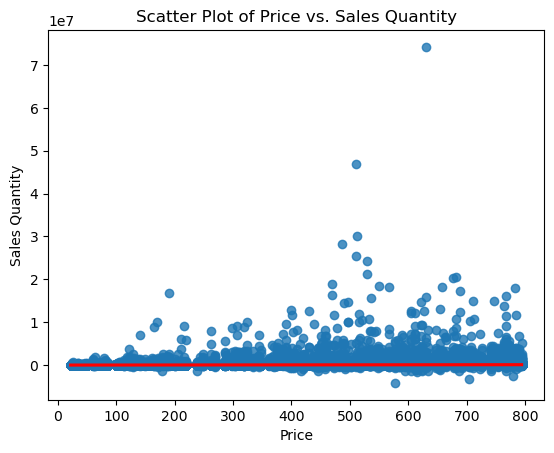

In [11]:
sns.regplot(x='Price', y='Sales', data=data, ci=None, line_kws={"color": "red"})
plt.title('Scatter Plot of Price vs. Sales Quantity')
plt.xlabel('Price')
plt.ylabel('Sales Quantity')
plt.savefig('scatter_price_vs_sales.png')
plt.show()


In [13]:
correlation, p_value = pearsonr(data['Price'], data['Sales'])
print(f"Hypothesis 1: Correlation: {correlation}, P-value: {p_value}")

Hypothesis 1: Correlation: 0.0706652122342445, P-value: 1.4141846626464404e-278


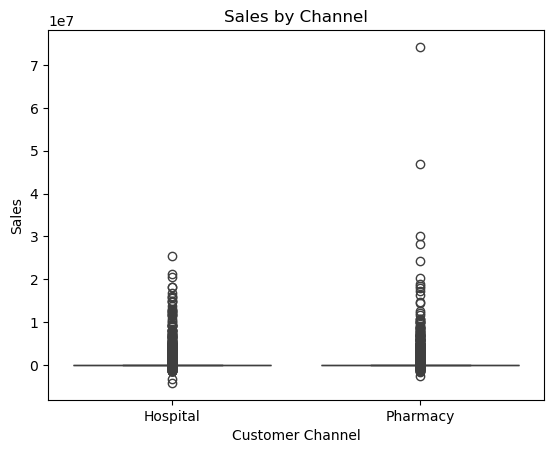

In [15]:
sns.boxplot(x='Channel', y='Sales', data=data)
plt.title('Sales by Channel')
plt.xlabel('Customer Channel')
plt.ylabel('Sales')
plt.savefig('boxplot_sales_by_channel.png')
plt.show()

In [17]:
channels = data['Channel'].unique()
data_channel1 = data[data['Channel'] == channels[0]]
data_channel2 = data[data['Channel'] == channels[1]]
t_stat, p_value = ttest_ind(data_channel1['Sales'], data_channel2['Sales'])
print(f"Hypothesis 2: T-statistic: {t_stat}, P-value: {p_value}")

Hypothesis 2: T-statistic: -2.077153182536199, P-value: 0.03778842554598785


C:\Users\Okorigwe Clinton\AppData\Local\Temp\ipykernel_4156\3956350800.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Channel', y='Sales', data=avg_sales, palette='viridis')


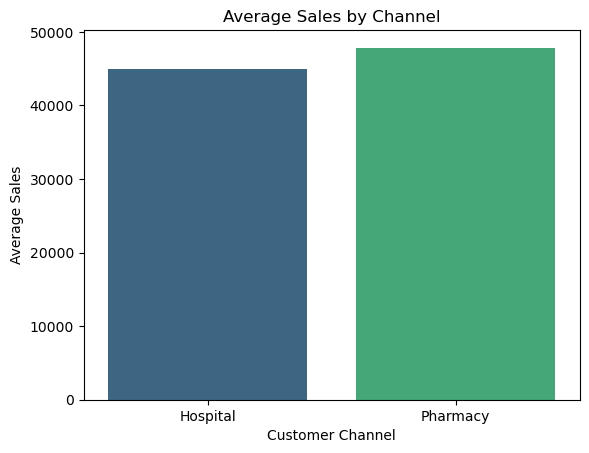

In [21]:
avg_sales = data.groupby('Channel')['Sales'].mean().reset_index()
sns.barplot(x='Channel', y='Sales', data=avg_sales, palette='viridis')
plt.title('Average Sales by Channel')
plt.xlabel('Customer Channel')
plt.ylabel('Average Sales')
plt.savefig('barchart_avg_sales_by_channel.png')
plt.show()